# Multivariate analysis

Dependent variables:
- correctness
- difficulty
- response time
- total length of fixations/visits
- average length of fixations/visits
- average pupil size
- number of fixations/visits

Independent variables: – personal characteristics from the survey + group (A, B)

We apply two approaches:
- explanatory variables: group (A/B) + personal characteristic (separately) → as two separate columns
- explanatory variable: group (A/B) + personal characteristic (together) → as merging columns

In [1]:
import pandas as pd
from colorama import Fore, Style

from functions.tests.multivariate_analysis import linear_mixed_effects

In [2]:
df_all = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/analizy_wieloczynnikowe.csv', index_col='idx')
df_all.shape

(80, 169)

In [3]:
ALPHA = 0.05

In [4]:
cols_fix_total = list(df_all.columns[1:16])
cols_fix_avg = list(df_all.columns[16:31])
cols_fix_num = list(df_all.columns[31:46])
cols_pupil = list(df_all.columns[46:54]) # jednak bez testowania wielkości źrenicy tylko na poleceniu
cols_visit_total = list(df_all.columns[58:73])
cols_visit_avg = list(df_all.columns[73:88])
cols_visit_num = list(df_all.columns[88:103])

cols_corr = list(df_all.columns[103:108])
cols_diff = list(df_all.columns[108:113])
cols_time = list(df_all.columns[113:118])

variables_single = list(df_all.columns[119:144])
variables_double = list(df_all.columns[144:])
variables_double

['Group_Płeć',
 'Group_Rok_urodzenia',
 'Group_Kierunek_studiów',
 'Group_Rok_studiów',
 'Group_Specjalność',
 'Group_Wady_wzroku',
 'Group_Ilość_snu',
 'Group_Samopocz',
 'Group_Stres',
 'Group_Zmęcz',
 'Group_Czyt_map',
 'Group_Podziel_uwg',
 'Group_Analit_myśl',
 'Group_Spostrzeg',
 'Group_Czyt_ze_zroz',
 'Group_MAT',
 'Group_POL',
 'Group_HIST',
 'Group_Typ_uczenia',
 'Group_Quest1_before',
 'Group_Quest2_before',
 'Group_Quest1_after',
 'Group_Quest2_after',
 'Group_is_change_1',
 'Group_is_change_2']

In [5]:
def color_print(data):
    for i, item in enumerate(data):
        if item == '###':
            print('-------------')
        elif item == '@@@':
            pass
        else:
            try:
                if data[i+1] == '':
                    continue
            except IndexError:
                pass
            
            if data[i-1] == '###':
                print(Fore.BLUE, item, Style.RESET_ALL)
                continue
            elif data[i-1] == "@@@":
                print(Fore.YELLOW, item, Style.RESET_ALL)
                continue
            
            if item == '':
                continue
            
            print(item)

In [6]:
def test_single(cols_metric, flag=False):
    statistically_significant = []
    for metric in cols_metric:
        statistically_significant.append('###')
        statistically_significant.append(metric)
        if flag:
            print(Fore.BLUE + '#####################################################################' + Style.RESET_ALL)
            print(metric)
            
        for var in variables_single:
            statistically_significant.append('@@@')
            statistically_significant.append(var)
            if flag:
                print(Fore.YELLOW + '@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@' + Style.RESET_ALL)
                print(var)
            
            statistically_significant, res = linear_mixed_effects(df_all, f'{metric} ~ {var} + C(Group)', 'ID', ALPHA, statistically_significant, flag)
                
    return statistically_significant
            
            
def test_double(cols_metric, flag=False):
    statistically_significant = []
    for metric in cols_metric:
        statistically_significant.append('###')
        statistically_significant.append(metric)
        if flag:
            print(Fore.BLUE + '#####################################################################' + Style.RESET_ALL)
            print(metric)
     
        for var in variables_double:
            statistically_significant.append('@@@')
            statistically_significant.append(var)
            if flag:
                print(Fore.YELLOW + '@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@' + Style.RESET_ALL)
                print(var)
            statistically_significant, res = linear_mixed_effects(df_all, f'{metric} ~ {var}', 'ID', ALPHA, statistically_significant, flag)
            
    return statistically_significant

### CORRECTNESS

In [7]:
statistically_significant = test_single(cols_corr)
color_print(statistically_significant)

-------------
 Sum_Corr 
 Samopocz 
Samopocz[T.wysoki]
 Stres 
Stres[T.wysoki]
 Quest1_after 
Quest1_after[T.B]
-------------
 Corr_1 
 Stres 
Stres[T.wysoki]
 Quest1_after 
Quest1_after[T.B]
 is_change_1 
is_change_1[T.True]
-------------
 Corr_2 
 Ilość_snu 
Ilość_snu[T.8]
 Typ_uczenia 
Typ_uczenia[T.Słuchowiec]
-------------
 Corr_3 
 Kierunek_studiów 
Kierunek_studiów[T.MISMaP Geografia]
 Samopocz 
Samopocz[T.wysoki]
 Quest2_after 
Quest2_after[T.tabela]
Quest2_after[T.wykres]
-------------
 Avg_Corr 
 Samopocz 
Samopocz[T.wysoki]
 Stres 
Stres[T.wysoki]
 Quest1_after 
Quest1_after[T.B]


In [8]:
statistically_significant = test_double(cols_corr)
color_print(statistically_significant)

-------------
 Sum_Corr 
 Group_Samopocz 
Group_Samopocz[T.A_wysoki]
Group_Samopocz[T.B_niski]
Group_Samopocz[T.B_wysoki]
 Group_Stres 
Group_Stres[T.A_wysoki]
 Group_Typ_uczenia 
Group_Typ_uczenia[T.B_Słuchowiec]
-------------
 Corr_1 
 Group_Płeć 
Group_Płeć[T.A_M]
Group_Płeć[T.B_K]
 Group_Samopocz 
Group_Samopocz[T.A_wysoki]
Group_Samopocz[T.B_wysoki]
Group_Samopocz[T.B_średni]
 Group_Stres 
Group_Stres[T.A_wysoki]
 Group_Czyt_ze_zroz 
Group_Czyt_ze_zroz[T.A_średni]
 Group_Quest1_after 
Group_Quest1_after[T.A_B]
Group_Quest1_after[T.B_B]
 Group_Quest2_after 
Group_Quest2_after[T.A_tabela]
Group_Quest2_after[T.A_wykres]
Group_Quest2_after[T.B_mapa]
Group_Quest2_after[T.B_tabela]
Group_Quest2_after[T.B_wykres]
 Group_is_change_1 
Group_is_change_1[T.A_True]
 Group_is_change_2 
Group_is_change_2[T.B_False]
-------------
 Corr_2 
 Group_Analit_myśl 
Group_Analit_myśl[T.B_niski]
 Group_Typ_uczenia 
Group_Typ_uczenia[T.B_Słuchowiec]
-------------
 Corr_3 
 Group_Samopocz 
Group_Samopocz[T

### DIFFICULTY

In [9]:
cols_diff

['Sum_Diff', 'Diff_1', 'Diff_2', 'Diff_3', 'Avg_Diff']

In [10]:
statistically_significant = test_single(cols_diff)

In [11]:
color_print(statistically_significant)

-------------
 Sum_Diff 
 Zmęcz 
Zmęcz[T.wysoki]
-------------
 Diff_1 
 Płeć 
C(Group)[T.B]
 Rok_urodzenia 
C(Group)[T.B]
 Kierunek_studiów 
C(Group)[T.B]
 Rok_studiów 
C(Group)[T.B]
 Specjalność 
C(Group)[T.B]
 Wady_wzroku 
C(Group)[T.B]
 Ilość_snu 
C(Group)[T.B]
 Samopocz 
C(Group)[T.B]
 Stres 
C(Group)[T.B]
 Zmęcz 
C(Group)[T.B]
 Czyt_map 
Czyt_map[T.średni]
C(Group)[T.B]
 Podziel_uwg 
C(Group)[T.B]
 Analit_myśl 
C(Group)[T.B]
 Spostrzeg 
C(Group)[T.B]
 Czyt_ze_zroz 
C(Group)[T.B]
 MAT 
C(Group)[T.B]
 POL 
C(Group)[T.B]
 HIST 
C(Group)[T.B]
 Typ_uczenia 
C(Group)[T.B]
 Quest1_before 
C(Group)[T.B]
 Quest2_before 
Quest2_before[T.tabela]
C(Group)[T.B]
 Quest1_after 
C(Group)[T.B]
 Quest2_after 
Quest2_after[T.tekst]
C(Group)[T.B]
 is_change_1 
is_change_1[T.True]
C(Group)[T.B]
 is_change_2 
C(Group)[T.B]
-------------
 Diff_2 
 Samopocz 
Samopocz[T.wysoki]
 Stres 
Stres[T.wysoki]
 Zmęcz 
Zmęcz[T.wysoki]
-------------
 Diff_3 
 Płeć 
C(Group)[T.B]
 Rok_urodzenia 
C(Group)[T.B]
 Kieru

In [12]:
statistically_significant = test_double(cols_diff)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [13]:
color_print(statistically_significant)

-------------
 Sum_Diff 
 Group_Specjalność 
Group_Specjalność[T.A_SPOŁ-EKO]
 Group_Zmęcz 
Group_Zmęcz[T.A_wysoki]
Group_Zmęcz[T.B_wysoki]
 Group_Spostrzeg 
Group_Spostrzeg[T.A_wysoki]
Group_Spostrzeg[T.B_niski]
Group_Spostrzeg[T.B_wysoki]
 Group_Quest2_before 
Group_Quest2_before[T.A_tabela]
-------------
 Diff_1 
 Group_Płeć 
Group_Płeć[T.B_M]
 Group_Kierunek_studiów 
Group_Kierunek_studiów[T.B_Geografia]
 Group_Ilość_snu 
Group_Ilość_snu[T.A_8]
Group_Ilość_snu[T.A_8<]
Group_Ilość_snu[T.A_<6]
Group_Ilość_snu[T.B_6]
Group_Ilość_snu[T.B_7]
Group_Ilość_snu[T.B_8]
Group_Ilość_snu[T.B_8<]
Group_Ilość_snu[T.B_<6]
 Group_Stres 
Group_Stres[T.B_niski]
 Group_Czyt_map 
Group_Czyt_map[T.B_wysoki]
Group_Czyt_map[T.B_średni]
 Group_Spostrzeg 
Group_Spostrzeg[T.B_niski]
Group_Spostrzeg[T.B_wysoki]
Group_Spostrzeg[T.B_średni]
 Group_MAT 
Group_MAT[T.B_VAL]
 Group_POL 
Group_POL[T.B_NO_VAL]
 Group_HIST 
Group_HIST[T.B_NO_VAL]
 Group_Typ_uczenia 
Group_Typ_uczenia[T.A_Kinestetyk]
 Group_Quest1_befor

### TIME

In [14]:
cols_time

['Sum_Time', 'Time_1', 'Time_2', 'Time_3', 'Avg_Time']

In [15]:
statistically_significant = test_single(cols_time)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/p

In [16]:
color_print(statistically_significant)

-------------
 Sum_Time 
 Płeć 
C(Group)[T.B]
 Rok_urodzenia 
C(Group)[T.B]
 Kierunek_studiów 
C(Group)[T.B]
 Rok_studiów 
C(Group)[T.B]
 Specjalność 
C(Group)[T.B]
 Wady_wzroku 
C(Group)[T.B]
 Ilość_snu 
C(Group)[T.B]
 Samopocz 
C(Group)[T.B]
 Stres 
C(Group)[T.B]
 Zmęcz 
C(Group)[T.B]
 Czyt_map 
C(Group)[T.B]
 Podziel_uwg 
C(Group)[T.B]
 Analit_myśl 
C(Group)[T.B]
 Spostrzeg 
C(Group)[T.B]
 Czyt_ze_zroz 
C(Group)[T.B]
 MAT 
C(Group)[T.B]
 POL 
C(Group)[T.B]
 HIST 
C(Group)[T.B]
 Typ_uczenia 
C(Group)[T.B]
 Quest1_before 
Quest1_before[T.B]
C(Group)[T.B]
 Quest2_before 
Quest2_before[T.tekst]
C(Group)[T.B]
 Quest1_after 
C(Group)[T.B]
 Quest2_after 
C(Group)[T.B]
 is_change_1 
C(Group)[T.B]
 is_change_2 
C(Group)[T.B]
-------------
 Time_1 
 Typ_uczenia 
Typ_uczenia[T.Wzrokowiec]
-------------
 Time_2 
 Płeć 
C(Group)[T.B]
 Rok_urodzenia 
C(Group)[T.B]
 Kierunek_studiów 
C(Group)[T.B]
 Rok_studiów 
C(Group)[T.B]
 Specjalność 
C(Group)[T.B]
 Wady_wzroku 
C(Group)[T.B]
 Ilość_snu 
C(Gro

In [17]:
statistically_significant = test_double(cols_time)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Fra

In [18]:
color_print(statistically_significant)

-------------
 Sum_Time 
 Group_Płeć 
Group_Płeć[T.B_K]
Group_Płeć[T.B_M]
 Group_Kierunek_studiów 
Group_Kierunek_studiów[T.B_Geografia]
Group_Kierunek_studiów[T.B_Gospodarka przestrzenna]
Group_Kierunek_studiów[T.B_MISMaP Geografia]
 Group_Rok_studiów 
Group_Rok_studiów[T.B_1]
Group_Rok_studiów[T.B_3]
 Group_Specjalność 
Group_Specjalność[T.B_FIZ ]
Group_Specjalność[T.B_NO_VAL]
Group_Specjalność[T.B_SPOŁ-EKO]
 Group_Wady_wzroku 
Group_Wady_wzroku[T.B_0]
Group_Wady_wzroku[T.B_1]
 Group_Ilość_snu 
Group_Ilość_snu[T.B_6]
Group_Ilość_snu[T.B_8]
 Group_Samopocz 
Group_Samopocz[T.B_średni]
 Group_Stres 
Group_Stres[T.B_niski]
Group_Stres[T.B_wysoki]
Group_Stres[T.B_średni]
 Group_Zmęcz 
Group_Zmęcz[T.B_niski]
Group_Zmęcz[T.B_wysoki]
Group_Zmęcz[T.B_średni]
 Group_Czyt_map 
Group_Czyt_map[T.B_wysoki]
Group_Czyt_map[T.B_średni]
 Group_Podziel_uwg 
Group_Podziel_uwg[T.B_wysoki]
 Group_Czyt_ze_zroz 
Group_Czyt_ze_zroz[T.B_niski]
Group_Czyt_ze_zroz[T.B_wysoki]
 Group_MAT 
Group_MAT[T.B_NO_VAL]
G

### PUPIL SIZE

In [19]:
statistically_significant = test_single(cols_pupil)

In [20]:
color_print(statistically_significant)

-------------
 Avg_pupil_withCom_1 
 Podziel_uwg 
Podziel_uwg[T.średni]
 POL 
POL[T.VAL]
 Quest2_before 
Quest2_before[T.tabela]
 Quest2_after 
Quest2_after[T.tabela]
-------------
 Avg_pupil_withCom_2 
 Podziel_uwg 
Podziel_uwg[T.średni]
 POL 
POL[T.VAL]
 Quest2_before 
Quest2_before[T.tabela]
 Quest2_after 
Quest2_after[T.tabela]
-------------
 Avg_pupil_withCom_3 
 Podziel_uwg 
Podziel_uwg[T.średni]
 POL 
POL[T.VAL]
 Quest2_after 
Quest2_after[T.tabela]
-------------
 Avg_AvgPupil_WithCom 
 Podziel_uwg 
Podziel_uwg[T.średni]
 POL 
POL[T.VAL]
 Quest2_after 
Quest2_after[T.tabela]
-------------
 Avg_pupil_withoutCom_1 
 Podziel_uwg 
Podziel_uwg[T.średni]
 POL 
POL[T.VAL]
 Quest2_before 
Quest2_before[T.tabela]
 Quest2_after 
Quest2_after[T.tabela]
-------------
 Avg_pupil_withoutCom_2 
 Podziel_uwg 
Podziel_uwg[T.średni]
 POL 
POL[T.VAL]
 Quest2_before 
Quest2_before[T.tabela]
 Quest2_after 
Quest2_after[T.tabela]
-------------
 Avg_pupil_withoutCom_3 
 Podziel_uwg 
Podziel_uwg[T.śred

In [21]:
statistically_significant = test_double(cols_pupil)

In [22]:
color_print(statistically_significant)

-------------
 Avg_pupil_withCom_1 
 Group_Podziel_uwg 
Group_Podziel_uwg[T.A_średni]
Group_Podziel_uwg[T.B_średni]
 Group_Spostrzeg 
Group_Spostrzeg[T.B_niski]
 Group_POL 
Group_POL[T.A_VAL]
Group_POL[T.B_VAL]
 Group_Quest2_before 
Group_Quest2_before[T.A_tabela]
 Group_Quest2_after 
Group_Quest2_after[T.A_tabela]
Group_Quest2_after[T.B_tabela]
-------------
 Avg_pupil_withCom_2 
 Group_Samopocz 
Group_Samopocz[T.B_niski]
 Group_Podziel_uwg 
Group_Podziel_uwg[T.A_średni]
Group_Podziel_uwg[T.B_średni]
 Group_POL 
Group_POL[T.A_VAL]
Group_POL[T.B_VAL]
 Group_Quest2_before 
Group_Quest2_before[T.B_tabela]
 Group_Quest2_after 
Group_Quest2_after[T.A_tabela]
Group_Quest2_after[T.B_tabela]
-------------
 Avg_pupil_withCom_3 
 Group_Zmęcz 
Group_Zmęcz[T.B_niski]
 Group_Podziel_uwg 
Group_Podziel_uwg[T.A_średni]
Group_Podziel_uwg[T.B_średni]
 Group_Analit_myśl 
Group_Analit_myśl[T.B_niski]
 Group_POL 
Group_POL[T.A_VAL]
Group_POL[T.B_VAL]
 Group_Quest2_after 
Group_Quest2_after[T.A_tabela]
Gr

### FIXATIONS - TOTAL

In [23]:
statistically_significant = test_single(cols_fix_total)

In [24]:
color_print(statistically_significant)

-------------
 Total_fix_withCom_1 
 Typ_uczenia 
Typ_uczenia[T.Kinestetyk]
 Quest2_before 
Quest2_before[T.tekst]
-------------
 Total_fix_withCom_2 
 Płeć 
C(Group)[T.B]
 Rok_urodzenia 
C(Group)[T.B]
 Kierunek_studiów 
C(Group)[T.B]
 Rok_studiów 
C(Group)[T.B]
 Specjalność 
C(Group)[T.B]
 Wady_wzroku 
C(Group)[T.B]
 Ilość_snu 
C(Group)[T.B]
 Samopocz 
C(Group)[T.B]
 Stres 
C(Group)[T.B]
 Zmęcz 
C(Group)[T.B]
 Czyt_map 
Czyt_map[T.średni]
C(Group)[T.B]
 Podziel_uwg 
C(Group)[T.B]
 Analit_myśl 
C(Group)[T.B]
 Spostrzeg 
C(Group)[T.B]
 Czyt_ze_zroz 
C(Group)[T.B]
 MAT 
C(Group)[T.B]
 POL 
C(Group)[T.B]
 HIST 
C(Group)[T.B]
 Typ_uczenia 
C(Group)[T.B]
 Quest1_before 
Quest1_before[T.B]
C(Group)[T.B]
 Quest2_before 
C(Group)[T.B]
 Quest1_after 
C(Group)[T.B]
 Quest2_after 
C(Group)[T.B]
 is_change_1 
C(Group)[T.B]
 is_change_2 
C(Group)[T.B]
-------------
 Total_fix_withCom_3 
 Płeć 
C(Group)[T.B]
 Rok_urodzenia 
C(Group)[T.B]
 Kierunek_studiów 
C(Group)[T.B]
 Rok_studiów 
C(Group)[T.B]
 

In [25]:
statistically_significant = test_double(cols_fix_total)

In [26]:
color_print(statistically_significant)

-------------
 Total_fix_withCom_1 
 Group_Ilość_snu 
Group_Ilość_snu[T.B_6]
 Group_Typ_uczenia 
Group_Typ_uczenia[T.B_Kinestetyk]
 Group_Quest2_before 
Group_Quest2_before[T.B_tekst]
-------------
 Total_fix_withCom_2 
 Group_Płeć 
Group_Płeć[T.B_K]
 Group_Kierunek_studiów 
Group_Kierunek_studiów[T.B_Geografia]
Group_Kierunek_studiów[T.B_Gospodarka przestrzenna]
Group_Kierunek_studiów[T.B_MISMaP Geografia]
 Group_Rok_studiów 
Group_Rok_studiów[T.B_1]
Group_Rok_studiów[T.B_2]
 Group_Specjalność 
Group_Specjalność[T.B_FIZ ]
Group_Specjalność[T.B_NO_VAL]
Group_Specjalność[T.B_SPOŁ-EKO]
 Group_Wady_wzroku 
Group_Wady_wzroku[T.B_1]
 Group_Ilość_snu 
Group_Ilość_snu[T.B_6]
 Group_Samopocz 
Group_Samopocz[T.B_średni]
 Group_Stres 
Group_Stres[T.B_niski]
Group_Stres[T.B_wysoki]
Group_Stres[T.B_średni]
 Group_Zmęcz 
Group_Zmęcz[T.B_niski]
Group_Zmęcz[T.B_wysoki]
 Group_Czyt_map 
Group_Czyt_map[T.B_wysoki]
Group_Czyt_map[T.B_średni]
 Group_Podziel_uwg 
Group_Podziel_uwg[T.B_niski]
Group_Podziel

### FIXATIONS - AVG

In [27]:
statistically_significant = test_single(cols_fix_avg)

In [28]:
color_print(statistically_significant)

-------------
 Avg_fix_withCom_1 
 Płeć 
C(Group)[T.B]
 Rok_urodzenia 
C(Group)[T.B]
 Kierunek_studiów 
C(Group)[T.B]
 Rok_studiów 
C(Group)[T.B]
 Specjalność 
C(Group)[T.B]
 Wady_wzroku 
C(Group)[T.B]
 Ilość_snu 
C(Group)[T.B]
 Samopocz 
C(Group)[T.B]
 Stres 
Stres[T.średni]
C(Group)[T.B]
 Zmęcz 
C(Group)[T.B]
 Czyt_map 
C(Group)[T.B]
 Podziel_uwg 
C(Group)[T.B]
 Analit_myśl 
C(Group)[T.B]
 Spostrzeg 
C(Group)[T.B]
 Czyt_ze_zroz 
C(Group)[T.B]
 MAT 
C(Group)[T.B]
 POL 
POL[T.VAL]
C(Group)[T.B]
 HIST 
C(Group)[T.B]
 Typ_uczenia 
C(Group)[T.B]
 Quest1_before 
C(Group)[T.B]
 Quest2_before 
C(Group)[T.B]
 Quest1_after 
C(Group)[T.B]
 Quest2_after 
C(Group)[T.B]
 is_change_1 
C(Group)[T.B]
 is_change_2 
C(Group)[T.B]
-------------
 Avg_fix_withCom_2 
 Płeć 
C(Group)[T.B]
 Rok_urodzenia 
C(Group)[T.B]
 Kierunek_studiów 
C(Group)[T.B]
 Rok_studiów 
C(Group)[T.B]
 Specjalność 
C(Group)[T.B]
 Wady_wzroku 
C(Group)[T.B]
 Ilość_snu 
C(Group)[T.B]
 Samopocz 
C(Group)[T.B]
 Stres 
C(Group)[T.B]
 Z

In [29]:
statistically_significant = test_double(cols_fix_avg)

In [30]:
color_print(statistically_significant)

-------------
 Avg_fix_withCom_1 
 Group_Płeć 
Group_Płeć[T.B_K]
Group_Płeć[T.B_M]
 Group_Rok_urodzenia 
Group_Rok_urodzenia[T.B_2000]
Group_Rok_urodzenia[T.B_2001]
Group_Rok_urodzenia[T.B_2002]
Group_Rok_urodzenia[T.B_2003]
Group_Rok_urodzenia[T.B_2004]
 Group_Kierunek_studiów 
Group_Kierunek_studiów[T.B_Geografia]
Group_Kierunek_studiów[T.B_Gospodarka przestrzenna]
Group_Kierunek_studiów[T.B_MISMaP Geografia]
 Group_Rok_studiów 
Group_Rok_studiów[T.B_1]
Group_Rok_studiów[T.B_2]
Group_Rok_studiów[T.B_3]
 Group_Specjalność 
Group_Specjalność[T.B_FIZ ]
Group_Specjalność[T.B_GEOINF ]
Group_Specjalność[T.B_NO_VAL]
Group_Specjalność[T.B_SPOŁ-EKO]
 Group_Wady_wzroku 
Group_Wady_wzroku[T.B_0]
Group_Wady_wzroku[T.B_1]
 Group_Ilość_snu 
Group_Ilość_snu[T.B_6]
Group_Ilość_snu[T.B_7]
Group_Ilość_snu[T.B_8]
Group_Ilość_snu[T.B_8<]
Group_Ilość_snu[T.B_<6]
 Group_Samopocz 
Group_Samopocz[T.B_niski]
Group_Samopocz[T.B_wysoki]
Group_Samopocz[T.B_średni]
 Group_Stres 
Group_Stres[T.B_niski]
Group_Stre

### FIXATIONS - NUM

In [31]:
statistically_significant = test_single(cols_fix_num)

In [32]:
color_print(statistically_significant)

-------------
 Num_fix_withCom_1 
 Rok_studiów 
Rok_studiów
 Typ_uczenia 
Typ_uczenia[T.Kinestetyk]
 Quest2_before 
Quest2_before[T.tekst]
-------------
 Num_fix_withCom_2 
 Płeć 
C(Group)[T.B]
 Rok_urodzenia 
C(Group)[T.B]
 Kierunek_studiów 
C(Group)[T.B]
 Rok_studiów 
C(Group)[T.B]
 Specjalność 
C(Group)[T.B]
 Wady_wzroku 
C(Group)[T.B]
 Ilość_snu 
C(Group)[T.B]
 Samopocz 
Samopocz[T.średni]
C(Group)[T.B]
 Stres 
Stres[T.wysoki]
C(Group)[T.B]
 Zmęcz 
C(Group)[T.B]
 Czyt_map 
Czyt_map[T.średni]
C(Group)[T.B]
 Podziel_uwg 
C(Group)[T.B]
 Analit_myśl 
C(Group)[T.B]
 Spostrzeg 
C(Group)[T.B]
 Czyt_ze_zroz 
C(Group)[T.B]
 MAT 
C(Group)[T.B]
 POL 
C(Group)[T.B]
 HIST 
C(Group)[T.B]
 Typ_uczenia 
C(Group)[T.B]
 Quest1_before 
Quest1_before[T.B]
C(Group)[T.B]
 Quest2_before 
C(Group)[T.B]
 Quest1_after 
C(Group)[T.B]
 Quest2_after 
C(Group)[T.B]
 is_change_1 
C(Group)[T.B]
 is_change_2 
C(Group)[T.B]
-------------
 Num_fix_withCom_3 
 Płeć 
C(Group)[T.B]
 Rok_urodzenia 
C(Group)[T.B]
 Kierun

In [33]:
statistically_significant = test_double(cols_fix_num)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [34]:
color_print(statistically_significant)

-------------
 Num_fix_withCom_1 
 Group_Ilość_snu 
Group_Ilość_snu[T.B_6]
 Group_Typ_uczenia 
Group_Typ_uczenia[T.B_Kinestetyk]
 Group_Quest2_before 
Group_Quest2_before[T.B_tekst]
-------------
 Num_fix_withCom_2 
 Group_Płeć 
Group_Płeć[T.B_K]
Group_Płeć[T.B_M]
 Group_Rok_urodzenia 
Group_Rok_urodzenia[T.B_2002]
 Group_Kierunek_studiów 
Group_Kierunek_studiów[T.B_Geografia]
Group_Kierunek_studiów[T.B_Gospodarka przestrzenna]
Group_Kierunek_studiów[T.B_MISMaP Geografia]
 Group_Rok_studiów 
Group_Rok_studiów[T.B_1]
Group_Rok_studiów[T.B_2]
 Group_Specjalność 
Group_Specjalność[T.B_FIZ ]
Group_Specjalność[T.B_NO_VAL]
Group_Specjalność[T.B_SPOŁ-EKO]
 Group_Wady_wzroku 
Group_Wady_wzroku[T.B_0]
Group_Wady_wzroku[T.B_1]
 Group_Ilość_snu 
Group_Ilość_snu[T.B_6]
Group_Ilość_snu[T.B_7]
 Group_Samopocz 
Group_Samopocz[T.B_średni]
 Group_Stres 
Group_Stres[T.B_niski]
Group_Stres[T.B_wysoki]
Group_Stres[T.B_średni]
 Group_Zmęcz 
Group_Zmęcz[T.B_niski]
Group_Zmęcz[T.B_wysoki]
 Group_Czyt_map 
Gr

### VISITS - TOTAL

In [35]:
statistically_significant = test_single(cols_visit_total)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


In [36]:
color_print(statistically_significant)

-------------
 Total_visit_withCom_1 
 Quest2_before 
Quest2_before[T.tekst]
-------------
 Total_visit_withCom_2 
 Płeć 
C(Group)[T.B]
 Rok_urodzenia 
C(Group)[T.B]
 Kierunek_studiów 
C(Group)[T.B]
 Rok_studiów 
C(Group)[T.B]
 Specjalność 
C(Group)[T.B]
 Wady_wzroku 
C(Group)[T.B]
 Ilość_snu 
C(Group)[T.B]
 Samopocz 
C(Group)[T.B]
 Stres 
Stres[T.wysoki]
C(Group)[T.B]
 Zmęcz 
C(Group)[T.B]
 Czyt_map 
C(Group)[T.B]
 Podziel_uwg 
C(Group)[T.B]
 Analit_myśl 
C(Group)[T.B]
 Spostrzeg 
C(Group)[T.B]
 Czyt_ze_zroz 
C(Group)[T.B]
 MAT 
C(Group)[T.B]
 POL 
C(Group)[T.B]
 HIST 
C(Group)[T.B]
 Typ_uczenia 
C(Group)[T.B]
 Quest1_before 
Quest1_before[T.B]
C(Group)[T.B]
 Quest2_before 
C(Group)[T.B]
 Quest1_after 
C(Group)[T.B]
 Quest2_after 
C(Group)[T.B]
 is_change_1 
C(Group)[T.B]
 is_change_2 
C(Group)[T.B]
-------------
 Total_visit_withCom_3 
 Płeć 
C(Group)[T.B]
 Rok_urodzenia 
C(Group)[T.B]
 Kierunek_studiów 
C(Group)[T.B]
 Rok_studiów 
C(Group)[T.B]
 Specjalność 
C(Group)[T.B]
 Wady_wzro

In [37]:
statistically_significant = test_double(cols_visit_total)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


In [38]:
color_print(statistically_significant)

-------------
 Total_visit_withCom_1 
 Group_Ilość_snu 
Group_Ilość_snu[T.B_6]
 Group_Stres 
Group_Stres[T.B_wysoki]
 Group_Quest2_before 
Group_Quest2_before[T.A_tabela]
Group_Quest2_before[T.B_tekst]
-------------
 Total_visit_withCom_2 
 Group_Płeć 
Group_Płeć[T.B_K]
 Group_Kierunek_studiów 
Group_Kierunek_studiów[T.B_Geografia]
Group_Kierunek_studiów[T.B_Gospodarka przestrzenna]
Group_Kierunek_studiów[T.B_MISMaP Geografia]
 Group_Rok_studiów 
Group_Rok_studiów[T.B_1]
Group_Rok_studiów[T.B_2]
 Group_Specjalność 
Group_Specjalność[T.B_FIZ ]
Group_Specjalność[T.B_NO_VAL]
Group_Specjalność[T.B_SPOŁ-EKO]
 Group_Wady_wzroku 
Group_Wady_wzroku[T.B_1]
 Group_Ilość_snu 
Group_Ilość_snu[T.B_6]
 Group_Samopocz 
Group_Samopocz[T.B_średni]
 Group_Stres 
Group_Stres[T.B_niski]
Group_Stres[T.B_wysoki]
Group_Stres[T.B_średni]
 Group_Zmęcz 
Group_Zmęcz[T.B_niski]
Group_Zmęcz[T.B_wysoki]
 Group_Czyt_map 
Group_Czyt_map[T.B_wysoki]
Group_Czyt_map[T.B_średni]
 Group_MAT 
Group_MAT[T.B_NO_VAL]
Group_MA

### VISITS - AVG

In [39]:
statistically_significant = test_single(cols_visit_avg)

In [40]:
color_print(statistically_significant)

-------------
 Avg_visit_withCom_1 
 Płeć 
C(Group)[T.B]
 Rok_urodzenia 
C(Group)[T.B]
 Kierunek_studiów 
C(Group)[T.B]
 Rok_studiów 
C(Group)[T.B]
 Specjalność 
C(Group)[T.B]
 Wady_wzroku 
C(Group)[T.B]
 Ilość_snu 
C(Group)[T.B]
 Samopocz 
C(Group)[T.B]
 Stres 
C(Group)[T.B]
 Zmęcz 
C(Group)[T.B]
 Czyt_map 
C(Group)[T.B]
 Podziel_uwg 
C(Group)[T.B]
 Analit_myśl 
C(Group)[T.B]
 Spostrzeg 
C(Group)[T.B]
 Czyt_ze_zroz 
C(Group)[T.B]
 MAT 
C(Group)[T.B]
 POL 
C(Group)[T.B]
 HIST 
HIST[T.VAL]
C(Group)[T.B]
 Typ_uczenia 
C(Group)[T.B]
 Quest1_before 
C(Group)[T.B]
 Quest2_before 
Quest2_before[T.tekst]
C(Group)[T.B]
 Quest1_after 
C(Group)[T.B]
 Quest2_after 
C(Group)[T.B]
 is_change_1 
C(Group)[T.B]
 is_change_2 
C(Group)[T.B]
-------------
 Avg_visit_withCom_2 
 Płeć 
C(Group)[T.B]
 Rok_urodzenia 
C(Group)[T.B]
 Kierunek_studiów 
C(Group)[T.B]
 Rok_studiów 
C(Group)[T.B]
 Specjalność 
C(Group)[T.B]
 Wady_wzroku 
C(Group)[T.B]
 Ilość_snu 
C(Group)[T.B]
 Samopocz 
C(Group)[T.B]
 Stres 
C(Gr

In [41]:
statistically_significant = test_double(cols_visit_avg)

In [42]:
color_print(statistically_significant)

-------------
 Avg_visit_withCom_1 
 Group_Płeć 
Group_Płeć[T.B_M]
 Group_Kierunek_studiów 
Group_Kierunek_studiów[T.B_Geografia]
 Group_Rok_studiów 
Group_Rok_studiów[T.B_2]
 Group_Wady_wzroku 
Group_Wady_wzroku[T.B_1]
 Group_Ilość_snu 
Group_Ilość_snu[T.B_6]
Group_Ilość_snu[T.B_<6]
 Group_Podziel_uwg 
Group_Podziel_uwg[T.B_niski]
Group_Podziel_uwg[T.B_średni]
 Group_Spostrzeg 
Group_Spostrzeg[T.B_niski]
Group_Spostrzeg[T.B_wysoki]
 Group_Czyt_ze_zroz 
Group_Czyt_ze_zroz[T.B_niski]
Group_Czyt_ze_zroz[T.B_wysoki]
 Group_POL 
Group_POL[T.B_NO_VAL]
 Group_HIST 
Group_HIST[T.A_VAL]
Group_HIST[T.B_NO_VAL]
 Group_Quest2_before 
Group_Quest2_before[T.A_tekst]
 Group_is_change_1 
Group_is_change_1[T.B_False]
 Group_is_change_2 
Group_is_change_2[T.B_True]
-------------
 Avg_visit_withCom_2 
 Group_Płeć 
Group_Płeć[T.B_M]
 Group_Kierunek_studiów 
Group_Kierunek_studiów[T.B_Gospodarka przestrzenna]
Group_Kierunek_studiów[T.B_MISMaP Geografia]
 Group_Rok_studiów 
Group_Rok_studiów[T.B_2]
 Group_

### VISITS - NUM

In [43]:
statistically_significant = test_single(cols_visit_num)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Fra

In [44]:
color_print(statistically_significant)

-------------
 Num_visit_withCom_1 
 Płeć 
C(Group)[T.B]
 Rok_urodzenia 
C(Group)[T.B]
 Kierunek_studiów 
C(Group)[T.B]
 Rok_studiów 
C(Group)[T.B]
 Specjalność 
C(Group)[T.B]
 Wady_wzroku 
C(Group)[T.B]
 Ilość_snu 
C(Group)[T.B]
 Samopocz 
C(Group)[T.B]
 Stres 
C(Group)[T.B]
 Zmęcz 
C(Group)[T.B]
 Czyt_map 
C(Group)[T.B]
 Podziel_uwg 
C(Group)[T.B]
 Analit_myśl 
C(Group)[T.B]
 Spostrzeg 
C(Group)[T.B]
 Czyt_ze_zroz 
C(Group)[T.B]
 MAT 
C(Group)[T.B]
 POL 
C(Group)[T.B]
 HIST 
C(Group)[T.B]
 Typ_uczenia 
C(Group)[T.B]
 Quest1_before 
C(Group)[T.B]
 Quest2_before 
C(Group)[T.B]
 Quest1_after 
C(Group)[T.B]
 Quest2_after 
C(Group)[T.B]
 is_change_1 
C(Group)[T.B]
 is_change_2 
C(Group)[T.B]
-------------
 Num_visit_withCom_2 
 Płeć 
C(Group)[T.B]
 Rok_urodzenia 
C(Group)[T.B]
 Kierunek_studiów 
C(Group)[T.B]
 Rok_studiów 
C(Group)[T.B]
 Specjalność 
C(Group)[T.B]
 Wady_wzroku 
C(Group)[T.B]
 Ilość_snu 
C(Group)[T.B]
 Samopocz 
C(Group)[T.B]
 Stres 
C(Group)[T.B]
 Zmęcz 
C(Group)[T.B]
 Cz

In [45]:
statistically_significant = test_double(cols_visit_num)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Fra

In [46]:
color_print(statistically_significant)

-------------
 Num_visit_withCom_1 
 Group_Płeć 
Group_Płeć[T.B_K]
Group_Płeć[T.B_M]
 Group_Rok_urodzenia 
Group_Rok_urodzenia[T.B_2000]
Group_Rok_urodzenia[T.B_2001]
 Group_Kierunek_studiów 
Group_Kierunek_studiów[T.B_Geografia]
Group_Kierunek_studiów[T.B_Gospodarka przestrzenna]
Group_Kierunek_studiów[T.B_MISMaP Geografia]
 Group_Rok_studiów 
Group_Rok_studiów[T.B_1]
Group_Rok_studiów[T.B_2]
Group_Rok_studiów[T.B_3]
 Group_Specjalność 
Group_Specjalność[T.B_FIZ ]
Group_Specjalność[T.B_GEOINF ]
Group_Specjalność[T.B_NO_VAL]
Group_Specjalność[T.B_SPOŁ-EKO]
 Group_Wady_wzroku 
Group_Wady_wzroku[T.B_0]
Group_Wady_wzroku[T.B_1]
 Group_Ilość_snu 
Group_Ilość_snu[T.B_6]
Group_Ilość_snu[T.B_7]
Group_Ilość_snu[T.B_8]
Group_Ilość_snu[T.B_8<]
Group_Ilość_snu[T.B_<6]
 Group_Samopocz 
Group_Samopocz[T.B_niski]
Group_Samopocz[T.B_wysoki]
Group_Samopocz[T.B_średni]
 Group_Stres 
Group_Stres[T.B_niski]
Group_Stres[T.B_wysoki]
Group_Stres[T.B_średni]
 Group_Zmęcz 
Group_Zmęcz[T.B_niski]
Group_Zmęcz[T

### Summary (statistically significant results):

#### Correctness:
1. Single
- sum_corr: samopoczucie (wysoki), stres (wysoki), quest1_after (B)
- corr_1: stres (wysoki), quest1_after(B), is_change_1 (True)
- corr_2: ilość snu (8), typ uczenia (słuchowiec)
- corr_3: kierunek studiów (MISMaP), samopoczucie (wysoki), quest2_after (tabela, wykres)
- avg_corr: samopoczucie (wysoki), stres (wysoki), quest1_after (B)

2. Double
- sum_corr: samopoczucie (A_wysoki, B_niski, B_wysoki), stres (A_wysoki), typ uczenia (B_słuchowiec)
- corr_1: płeć (A_M, B_K), samopoczucie (A_wysoki, B_wysoki, B_średni), stres (A_wysoki), czytanie ze zrozumieniem (A_średni), quest1_after (A_B, B_B), quest2_after (A_tabela, A_wykres, B_mapa, B_tabela, B_wykres), is_change_1 (A_True), is_change_2 (B_False)
- corr_2: Analityczne myślenie (B_niski), typ uczenia (B_słuchowiec)
- corr_3: samopoczucie (A_wysoki, B_wysoki), podzielność uwagi (B_niski)
- avg_corr: samopoczucie (A_wysoki, B_niski, B_wysoki), stres (A_wysoki), typ uczenia (B_słuchowiec)

#### Difficulty:
1. Single
- sum_diff: zmęczenie (wysoki)
- diff_1: grupa: płeć, rok urodzenia, kierunek studiów, rok studiów, specjalność, wady wzroku, ilość snu, samopoczucie, stres, zmęczenie, czytanie map, podzielność uwagi, analityczne myślenie, spostrzegawczość, czytanie ze zrozumieniem, MAT, POL, HIST, Typ_uczenia, Quest1_before, Quest2_before, Quest1_after, Quest2_after, is_change_1, is_change_2; czytanie map (średni), quest2_before (tabela), quest2_after (tekst), is_change_1 (True)
- diff_2: samopoczucie (wysoki), stres (wysoki), zmęczenie (wysoki)
- diff_3: grupa: płeć, rok urodzenia, kierunek studiów, rok studiów, specjalność, wady wzroku, ilość snu, samopoczucie, stres, zmęczenie, czytanie map, podzielność uwagi, analityczne myślenie, spostrzegawczość, czytanie ze zrozumieniem, MAT, POL, HIST, typ uczenia, quest1_before, quest2_before, quest1_after, quest2_after, is_change_1, is_change_2; zmęczenie (wysoki), spostrzegawczość (wysoki), HIST (pisał)
- avg_diff: zmęczenie (wysoki)

2. Double
- sum_diff: specjalność (A_społ_eko), zmęczenie (A_wysoki, B_wysoki), spostrzegawczość (A_wysoki, B_niski, B_wysoki), quest2_before (A_tabela)
- diff_1: płeć (B_M), kierunek studiów (B_geografia), ilość snu (A_8, A_8<, A_<6, B_6, B_7, B_8, B_8<, B_<6), stres (B_niski), czytanie map (B_wysoki, B_średni), spostrzegawczość (B_niski, B_wysoki, B_średni), MAT (B_pisał), POL (B_nie_pisał), HIST (B_nie_pisał), typ uczenia (A_kinestetyk), quest1_before (B_B), quest2_before (A_tabela), quest1_after (B_B), quest2_after (B_wykres), is_change_1 (A_True, B_False), is_change_2 (B_True)
- diff_2: rok studiów (B_3), stres (B_wysoki), czytanie ze zrozumieniem (B_niski), POL (A_pisał), quest2_after (B_wykres), 
- diff_3: płeć (B_K), rok urodzenia (B_2000), kierunek studiów (A_Mismap, B_geografia), rok studiów (A_2, B_1, B_2), specjalność (B_fiz), samopoczucie (B_niski), stres (B_niski), zmęczenie (A_wysoki, B_niski, B_wysoki), czytanie map (B_wysoki), spostrzegawczość (A_wysoki), MAT (B_nie pisał), POL (B_nie_pisał, B_pisał), HIST (A_pisał, B_nie_pisał, B_pisał), typ uczenia: (B_brak_dominującego), quest2_before (A_tekst, B_mapa, B_tabela, B_wykres), quest1_after (A_B, B_A, B_B), quest2_after (B_mapa), is_change_1 (B_False), is_change_2 (B_False)
- avg_diff: specjalność (a_społ-eko), zmęczenie (A_wysoki, B_wysoki), spostrzegawczość (A_wysoki, B_niski, B_wysoki), quest2_before (A_tabela)

#### Time:
1. Single
- sum_time: grupa: płeć, rok urodzenia, kierunek studiów, rok studiów, specjalność, wady_wzroku, ilość snu, samopoczucie, stres, zmęczenie, czytanie map, podzielność uwagi, analityczne myślenie, spostrzegawczość, czytanie ze zrozumieniem, MAT, POL, HIST, typ uczenia, quest1_before, quest2_before, quest1_after, quest2_after, is_change_1, is_change_2; quest1_before (B), quest2_before (tekst)
- time_1: typ uczenia (wzrokowiec)
- time_2: grupa: płeć, rok urodzenia, kierunek studiów, rok studiów, specjalność, wady_wzroku, ilość snu, samopoczucie, stres, zmęczenie, czytanie map, podzielność uwagi, analityczne myślenie, spostrzegawczość, czytanie ze zrozumieniem, MAT, POL, HIST, typ uczenia, quest1_before, quest2_before, quest1_after, quest2_after, is_change_1, is_change_2; stres (wysoki), quest1_before (B)
- time_3: grupa: płeć, rok urodzenia, kierunek studiów, rok studiów, specjalność, wady_wzroku, ilość snu, samopoczucie, stres, zmęczenie, czytanie map, podzielność uwagi, analityczne myślenie, spostrzegawczość, czytanie ze zrozumieniem, MAT, POL, HIST, typ uczenia, quest1_before, quest2_before, quest1_after, quest2_after, is_change_1, is_change_2; quest1_before (B), quest2_before (tekst)
- avg_time: grupa: płeć, rok urodzenia, kierunek studiów, rok studiów, specjalność, wady_wzroku, ilość snu, samopoczucie, stres, zmęczenie, czytanie map, podzielność uwagi, analityczne myślenie, spostrzegawczość, czytanie ze zrozumieniem, MAT, POL, HIST, typ uczenia, quest1_before, quest2_before, quest1_after, quest2_after, is_change_1, is_change_2; quest1_before (B), quest2_before (tekst)


2. Double
- sum_time: płeć (B_K, B_M), kierunek studiów (B_geografia, B_gospodarka_przest, B_mismap), rok_studiów (B_1, B_3), specjalność (B_fiz, B_gospodarka, B_społ-eko), wady_wzroku (B_0, B_1), ilość snu (B_6, B_8), samopoczucie (B_średni), stres (B_niski, B-wysoki, B_średni), zmęczenie (B_niski, B_wysoki, B_średni), czytanie map (B_średni, B_wysoki), podzielność uwagi (B-wysoki), czytanie ze zrozumieniem (B_niski, B-wysoki), MAT (B_nie-pisał, B_pisał), POL (B_nie-pisał, B-pisał), HIST (B-nie-pisał, B-pisał), typ uczenia (B_brak dominującego, B_wzrokowiec), quest1_before (B_B), quest2_before (B_mapa, B_tekst, B_wykres), quest1_after (B_A, B_B), quest2_after (B_mapa, B_wykres), is_change_1 (B_False, B_True), is_change_2 (B_false, B_True)
- time_1: ilość snu(B_6), quest2_before (B_tekst)
- time_2: płeć (B_K), kierunek studiów (B_geografia, B-gospodarka, B-mismap), rok studiów (B-1, B_2), specjalność (B_fiz, B_gospodarka), wady wzroku (B_1), ilość snu (B_6), samopoczucie (B_niski, B_średni), stres (B_niski, B_wysoki, B_średni), zmęczenie (B_niski, B_wysoki), czytanie map (B_wysoki, B_średni), MAT (B_nie pisał, B-pisał), POL (B_nie pisał), HIST (B-nie-pisał), typ uczenia (B_brak_dominujacego), quest1_before (B_B), quest2_before (B_mapa, B_tekst, B_wykres), quest1_after (B_A, B_B), quest2_after (B_mapa, B_wykres), is_change_1 (B_False, B_True), is_change_2 (B_true)
- time_3: płeć (B_K, B_M), kierunek studiów (B_geografia, B-gosp-przest, B-MISMAP), rok studiów (B_1, B_2, B_3), specjalność (B_fiz, B_geoinf, B_gosp_przest, B-społ-eko), wady wzroku (B_0, B_1), ilość snu (B_6, B_7, B_8, B_<6), samopoczucie (B_niski, B_wysoki), stres (B_niski, B_średni), zmęczenie (B_niski, B_wysoki, B_średni), czytanie map (B_wysoki, B_średni), podzielność uwagi (B_niski, B_wysoki, B_średni), analityczne myślenie (B_niski, B_średni), czytanie ze zrozumieniem (B_niski, B_wysoki), MAT (B-nie-pisał, B-pisał), POL (B_nie-pisał, B_pisał), HIST (B_nie_pisał, B_pisał), typ uczenia (B_brak-dominujacego, B-słuchowiec, B_wzrokowiec), quest1_before (B_B), quest2_before (A_tekst, B_mapa, B_tabela, B_tekst, B_wykres), quest1_after (B_A, B_B), quest2_after (B_mapa, B_tabela, B_wykres), is_change_1 (B_False, B_true), is_change_2 (B-false, B-true) 
- avg_time: płeć (B_K, B_M), kierunek studiów (B_geografia, B-gosp-przest, B-MISMAP), rok studiów (B_1, B_3), specjalność (B_fiz, B_gosp_przest, B-społ-eko), wady wzroku (B_0, B_1), ilość snu (B_6, B_8), samopoczucie (B_średni), stres (B_niski, B_średni, B_wysoki), zmęczenie (B_niski, B_wysoki, B_średni), czytanie map (B_wysoki, B_średni), podzielność uwagi (B_wysoki), czytanie ze zrozumieniem (B_niski, B_wysoki), MAT (B-nie-pisał, B-pisał), POL (B_nie-pisał, B_pisał), HIST (B_nie_pisał, B_pisał), typ uczenia (B_brak-dominujacego, B_wzrokowiec), quest1_before (B_B), quest2_before (B_mapa, B_tekst, B_wykres), quest1_after (B_A, B_B), quest2_after (B_mapa, B_wykres), is_change_1 (B_False, B_true), is_change_2 (B-false, B-true) 

### Plotting p-values

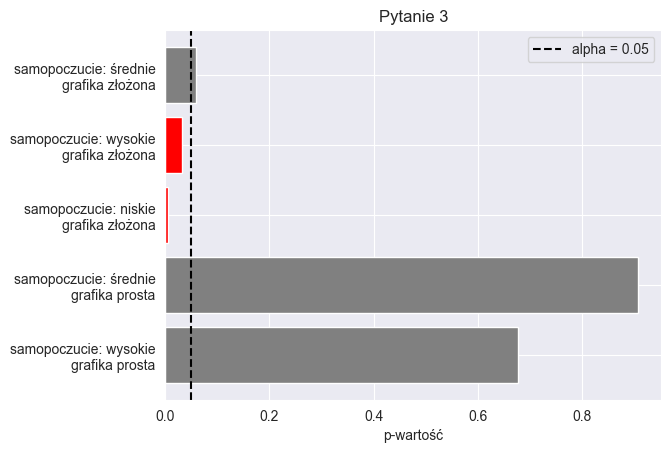

In [47]:
import matplotlib.pyplot as plt
import numpy as np

def plot_p_values(p_values, names, title, alpha=0.05, maps=None):
    if maps is None:
        maps = {name: name for name in names}

    significant = np.array(p_values) < alpha
    colors = ['red' if sig else 'gray' for sig in significant]

    mapped_names = [maps.get(name, name) for name in names]

    plt.barh(mapped_names, p_values, color=colors)
    plt.axvline(alpha, color='black', linestyle='--', label=f'alpha = {alpha}')
    plt.xlabel('p-wartość')
    plt.title(title)
    plt.legend()
    plt.show()


from statsmodels.regression.mixed_linear_model import MixedLM
metric = 'Time_3'
var = 'Group_Samopocz'
formula = f'{metric} ~ {var}'
md = MixedLM.from_formula(formula, data=df_all, groups=df_all['ID'])
mdf = md.fit()
p_values = mdf.pvalues[1:-1]
names = mdf.model.exog_names[1:]

maps = {'Group_Samopocz[T.B_średni]': 'samopoczucie: średnie\ngrafika złożona', 'Group_Samopocz[T.B_wysoki]': 'samopoczucie: wysokie\ngrafika złożona', 'Group_Samopocz[T.B_niski]': 'samopoczucie: niskie\ngrafika złożona', 'Group_Samopocz[T.A_średni]': 'samopoczucie: średnie\ngrafika prosta', 'Group_Samopocz[T.A_wysoki]': 'samopoczucie: wysokie\ngrafika prosta', 'Group_Samopocz[T.A_niski]': 'samopoczucie: niskie\ngrafika prosta'}
plot_p_values(p_values, names, 'Pytanie 3', ALPHA, maps)

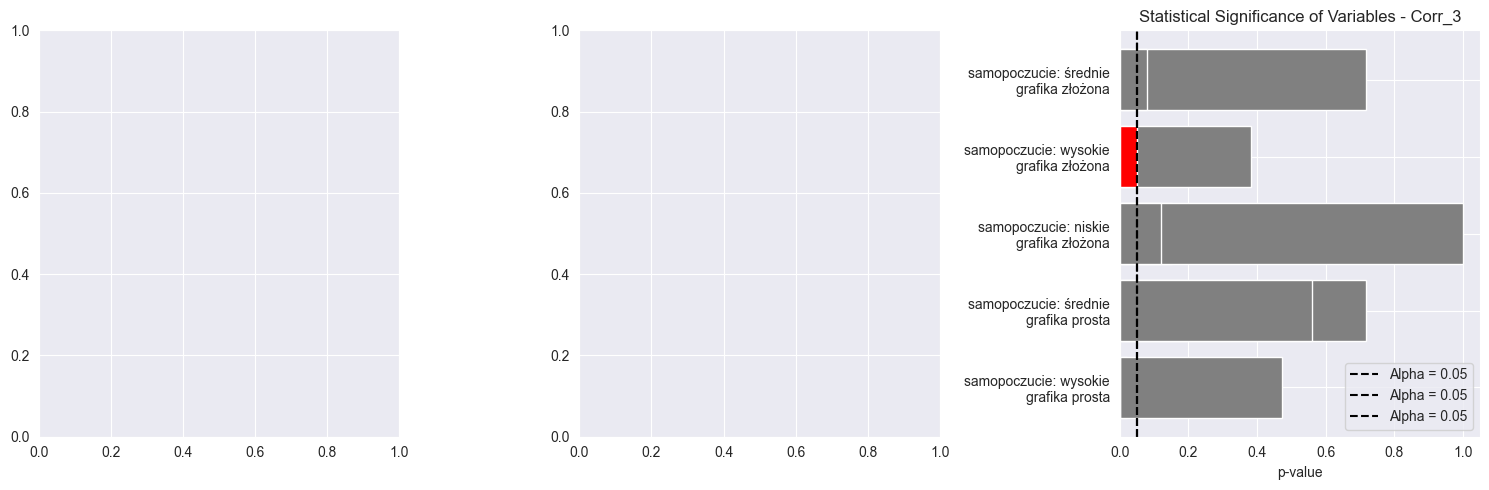

In [48]:
def plot_p_values(p_values, names, alpha=0.05, maps=None, subplot_title=''):
    if maps is None:
        maps = {name: name for name in names}

    significant = np.array(p_values) < alpha
    colors = ['red' if sig else 'gray' for sig in significant]

    mapped_names = [maps.get(name, name) for name in names]

    plt.barh(mapped_names, p_values, color=colors)
    plt.axvline(alpha, color='black', linestyle='--', label=f'Alpha = {alpha}')
    plt.xlabel('p-value')
    plt.title(f'Statistical Significance of Variables - {subplot_title}')
    plt.legend()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

subplot_titles = ['Corr_1', 'Corr_2', 'Corr_3']

for i, ax in enumerate(axes):
    metric = subplot_titles[i]
    var = 'Group_Samopocz'
    formula = f'{metric} ~ {var}'
    md = MixedLM.from_formula(formula, data=df_all, groups=df_all['ID'])
    mdf = md.fit()
    p_values = mdf.pvalues[1:-1]
    names = mdf.model.exog_names[1:]
    plot_p_values(p_values, names, ALPHA, maps, subplot_titles[i])
    plt.tight_layout()

plt.show()